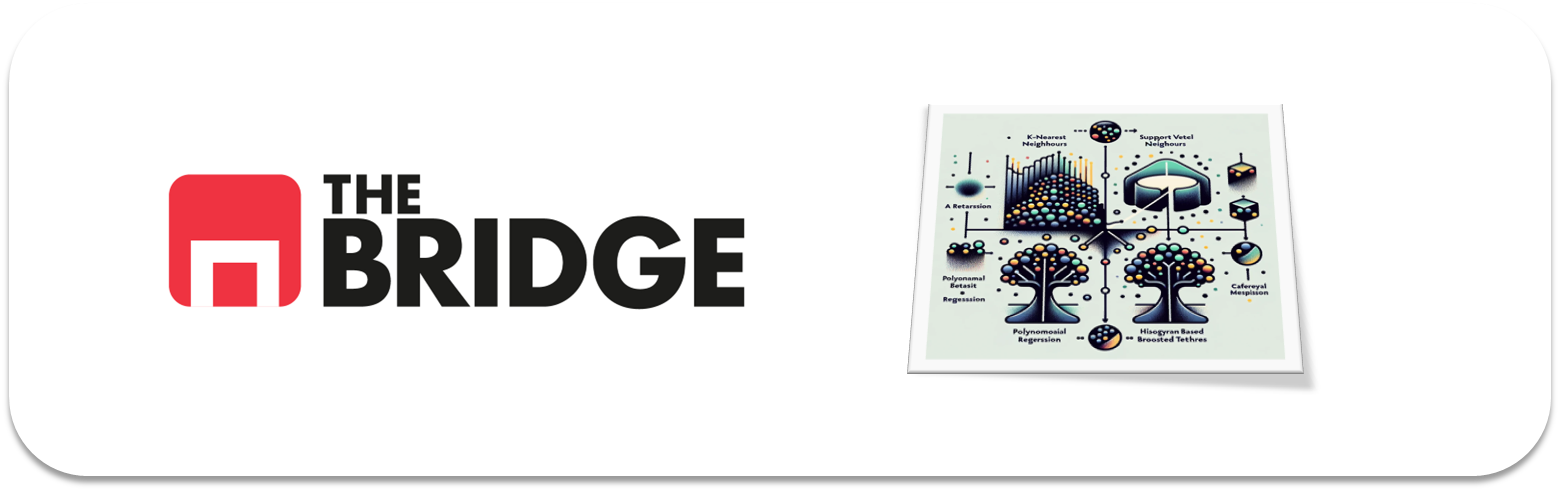

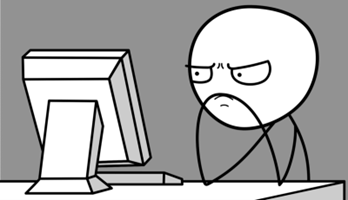

Para hacer un **repaso a los problemas de clasificacion con ML**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCIóN: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos básicos en la creación de un modelo de ML para resolver un problema de predicción a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificación a través de los siguientes pasos:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluación contra test.  
11. Análisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.  

### El problema

La unidad oncológica del hospital de Madison, Wisconsin, está trabajando en un tratamiento muy prometedor sobre el cáncer de mama. Desgraciadamente es un tratamiento con efectos secundarios y todavía excesivamente caro, pero cuya efectividad es extraordinaria si se aplica en las primeras etpas o incluso antes de haberlo desarrollado. 

En este sentido, la univeridad quiere disponer de un modelo que le permita detectar potenciales pacientes pero con un alto nivel de acierto en detectar quien puede tener cáncer para no aplicar el tratamiento a personas que no fueran a desarrollarlo y por tanto no sólo perder dinero, sino también, y más importante causar problemas a esas personas. 

Nos piden trabajar sobre datos que ya tienen, y que pueden obtener facilmente de cualquier futuro aspirante a las pruebas y ensayos con el tratamiento, de pacientes que desarrollaron y no el cáncer. Sobre ese dataset quieren que les proporcionemos el mejor modelo de predicción de quién desarrollará o no el cáncer y que cumpla con las expectativas del párrafo anterior.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [36]:
# Librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias Bootcamp (Data Science - The Bridge Oct24')
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
np.random.seed(42)

# Modelos de ML de clasificación a utilizar en el notebook
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Herramientas de sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

### Ejercicio 1: Entendiendo el problema de "Negocio"

En función de la descripción del problema de "negocio" y sin mirar todavía los datos, ¿qué tipo de problema de clasificación vamos a resolver? ¿Qué métricas creess más conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre sí?

- Problema Supervisado de clasificación binaria (Se les diagnosticará o no cancer de mama)

### Ejercicio 2: Obtención y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripción general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignalé el nombre de la columna correspondiente.

In [2]:
df = pd.read_csv("./data/wisconsin_cancer.csv", sep = "|")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [4]:
tml.describe_df(df)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,diagnosis,object,0.0,2,0.351494
1,radius_mean,float64,0.0,456,80.140598
2,texture_mean,float64,0.0,479,84.182777
3,perimeter_mean,float64,0.0,522,91.739895
4,area_mean,float64,0.0,539,94.727592
5,smoothness_mean,float64,0.0,474,83.304042
6,compactness_mean,float64,0.0,537,94.376098
7,concavity_mean,float64,0.0,537,94.376098
8,concave points_mean,float64,0.0,542,95.254833
9,symmetry_mean,float64,0.0,432,75.922671


In [5]:
tml.tipifica_variables(df,10,15)

,nombre_variable,tipo_sugerido
0,diagnosis,Binaria
1,radius_mean,Numérica Discreta
2,texture_mean,Numérica Discreta
3,perimeter_mean,Numérica Discreta
4,area_mean,Numérica Discreta
5,smoothness_mean,Numérica Discreta
6,compactness_mean,Numérica Discreta
7,concavity_mean,Numérica Discreta
8,concave points_mean,Numérica Discreta
9,symmetry_mean,Numérica Discreta


In [6]:
target = "diagnosis"

In [7]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

NOTA: Para más información sobre el dataset el hospital nos redirige a esta [página web](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

### Ejercicio 3: Split

Haz el split en train y test.

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2)

X_train = train_set.drop(columns=target)
X_test = test_set.drop(columns=target)

y_train = train_set[target]
y_test = test_set[target]

### Ejercicio 4: MiniEDA (I)

Analiza la distribución frecuencial de target brevemente.

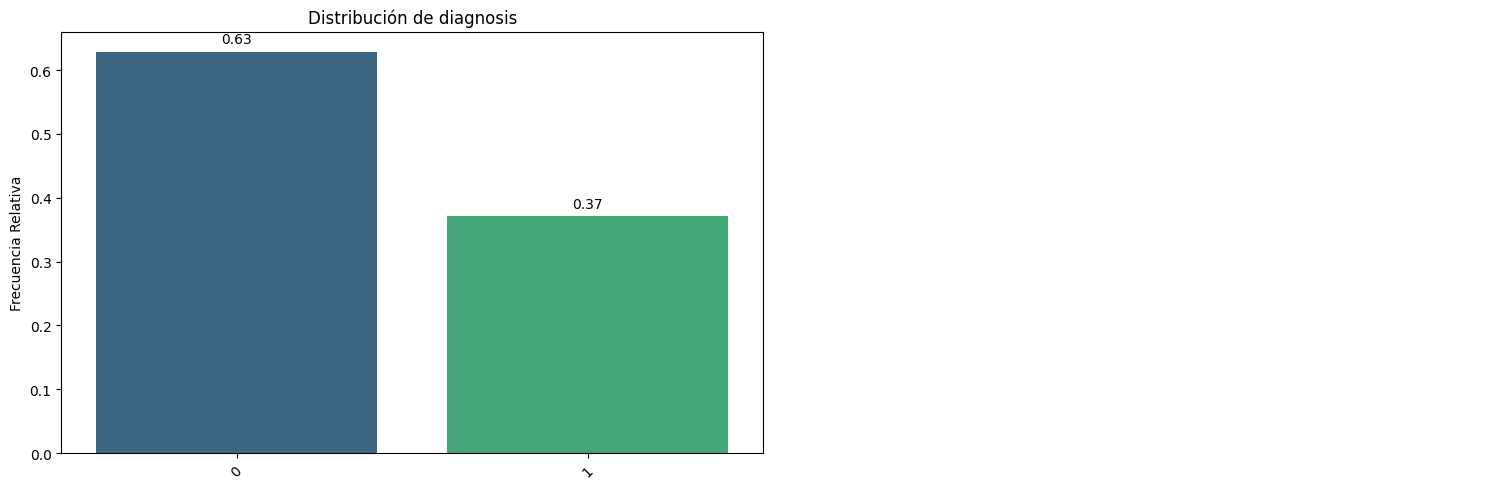

In [9]:
bvt.pinta_distribucion_categoricas(train_set, [target], relativa=True, mostrar_valores=True)

### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, de forma que veamos las distintas distribuciones para cada clase (puedes emplear la libería gráfica que crees conveniente)

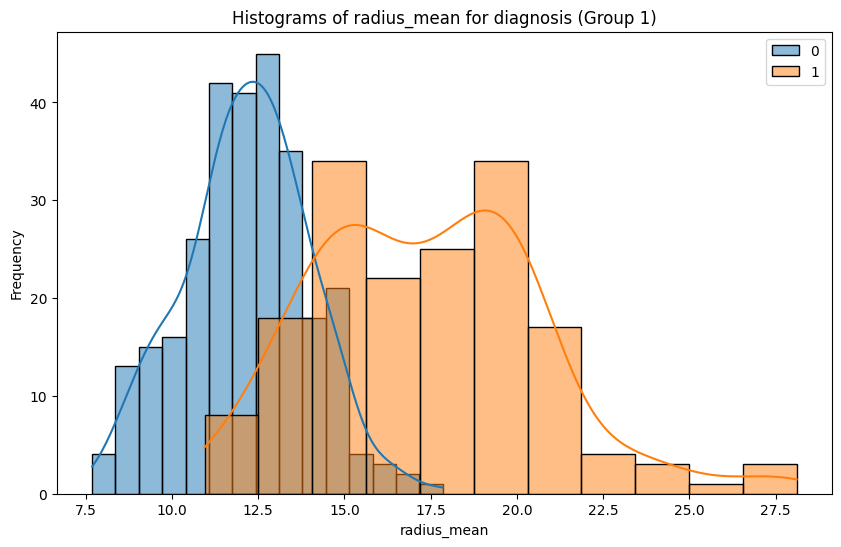

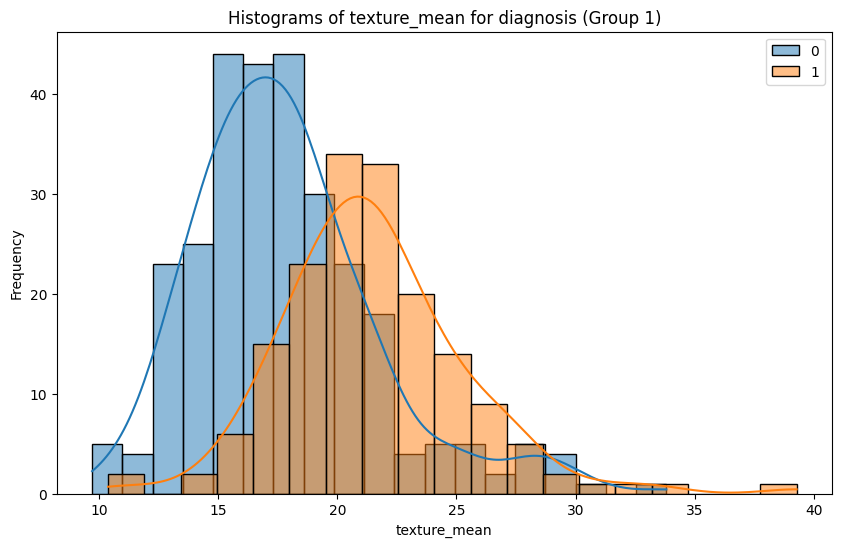

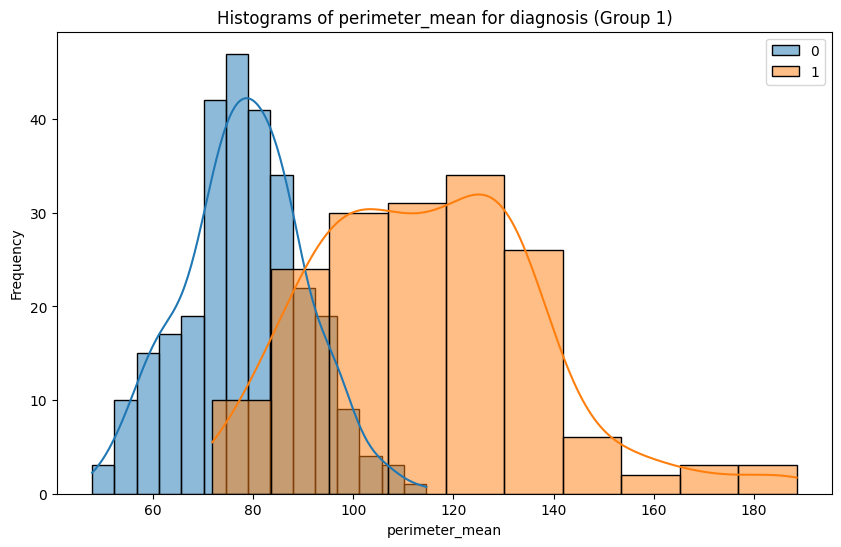

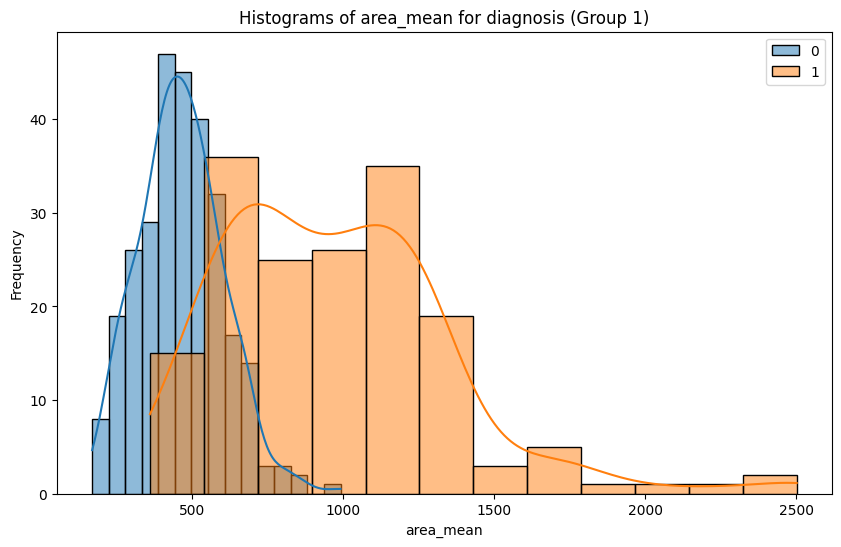

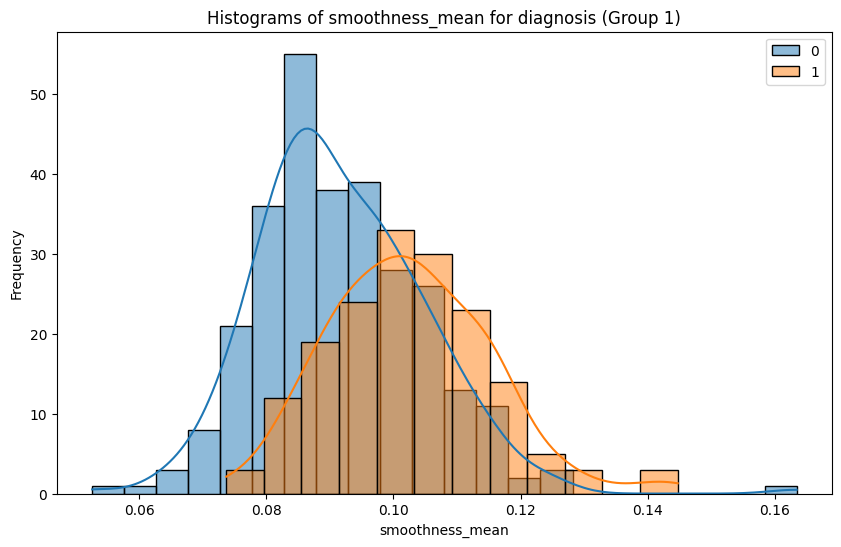

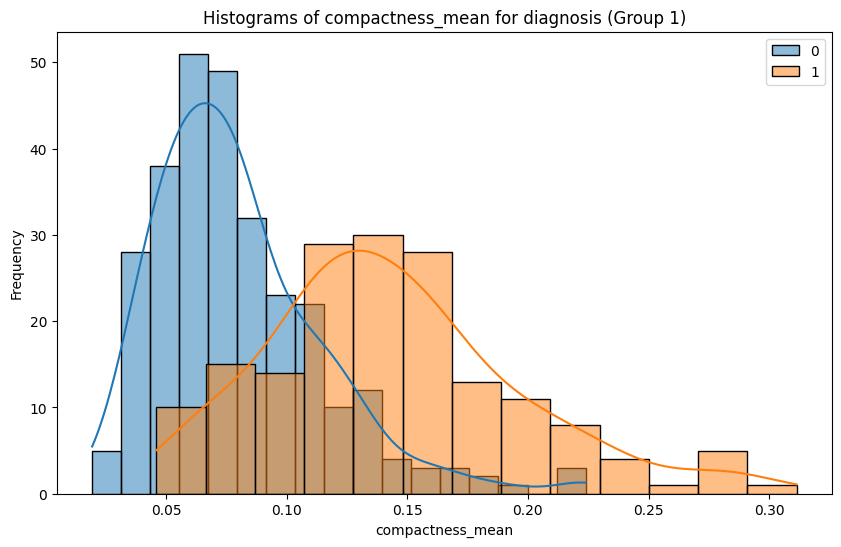

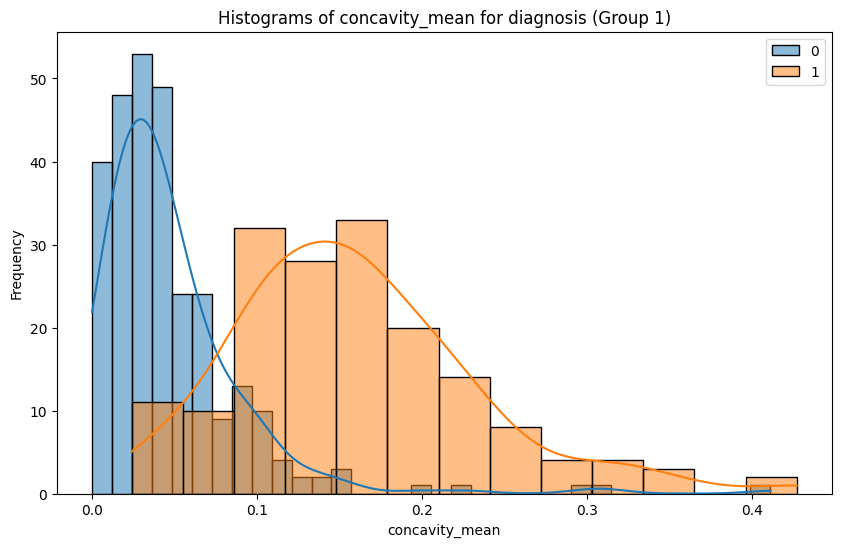

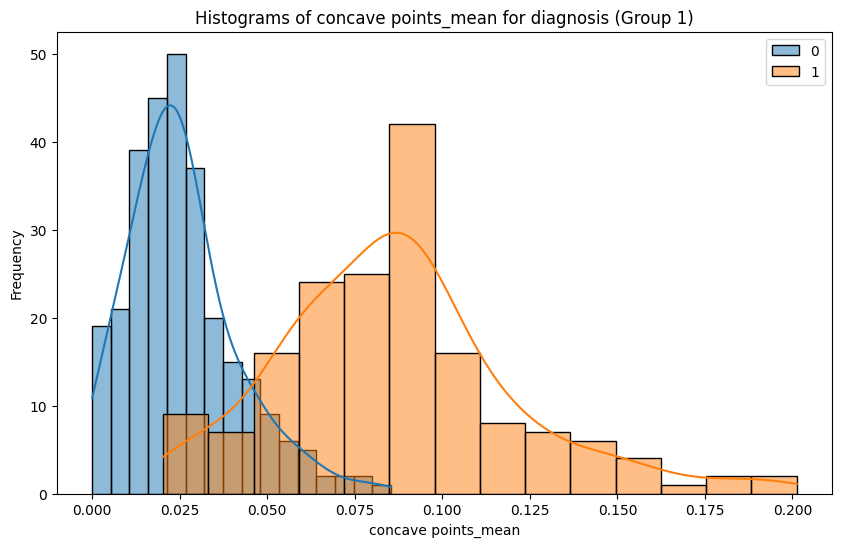

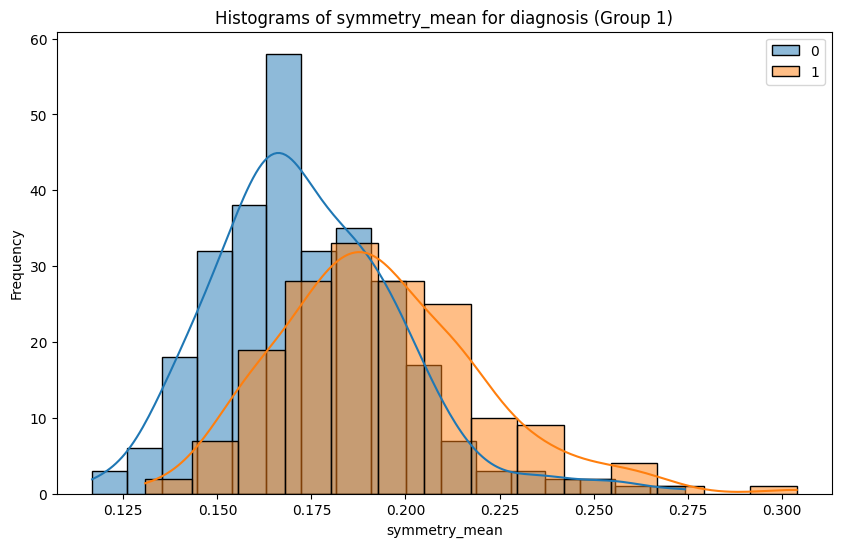

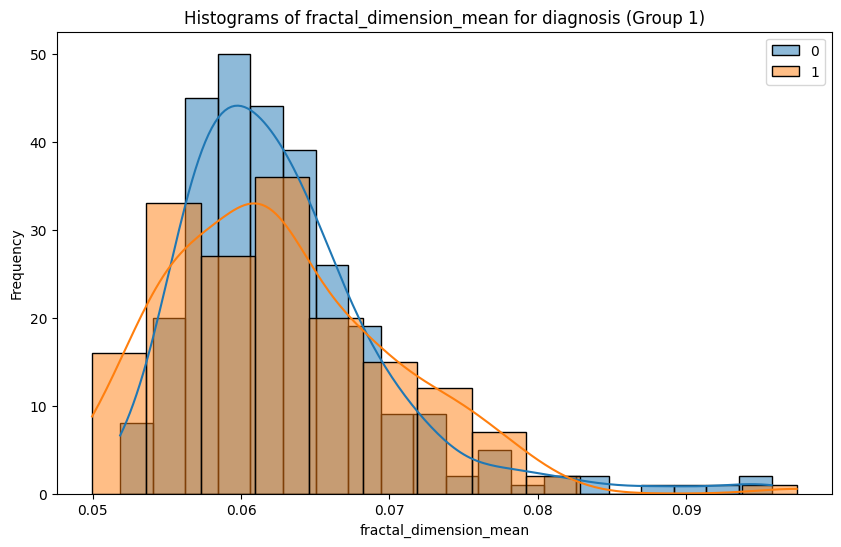

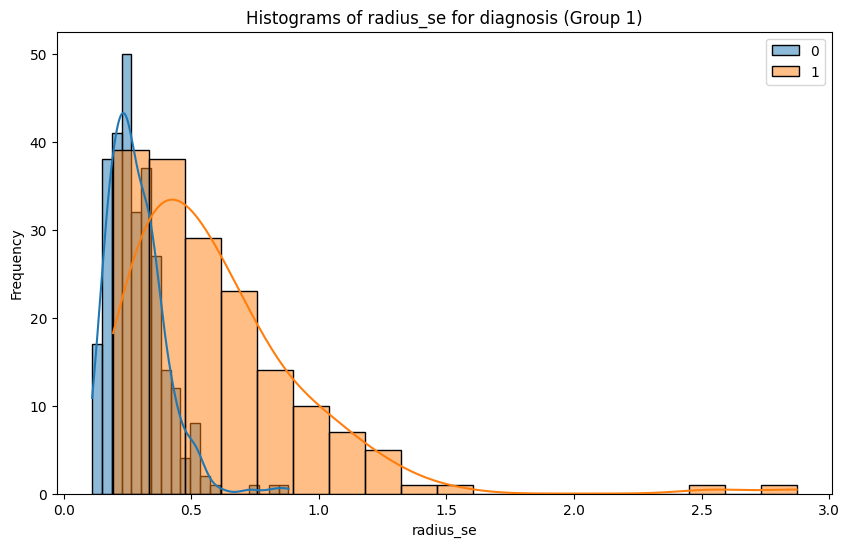

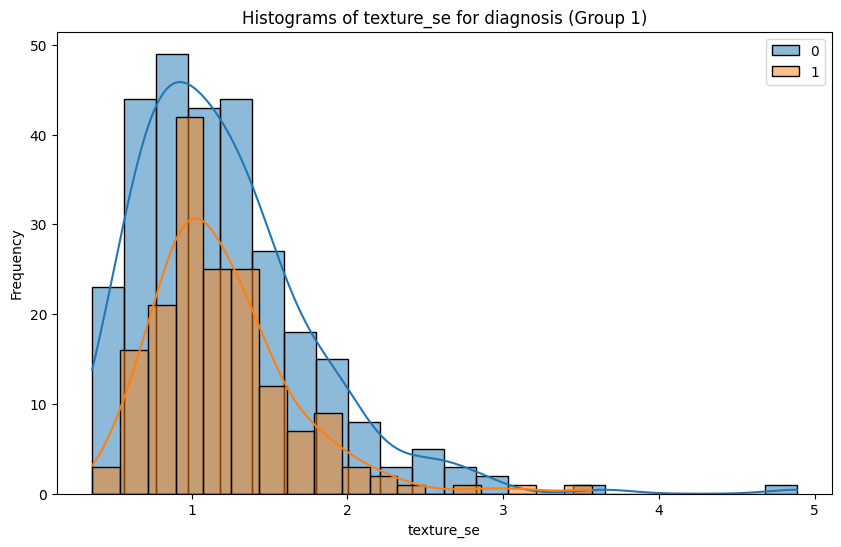

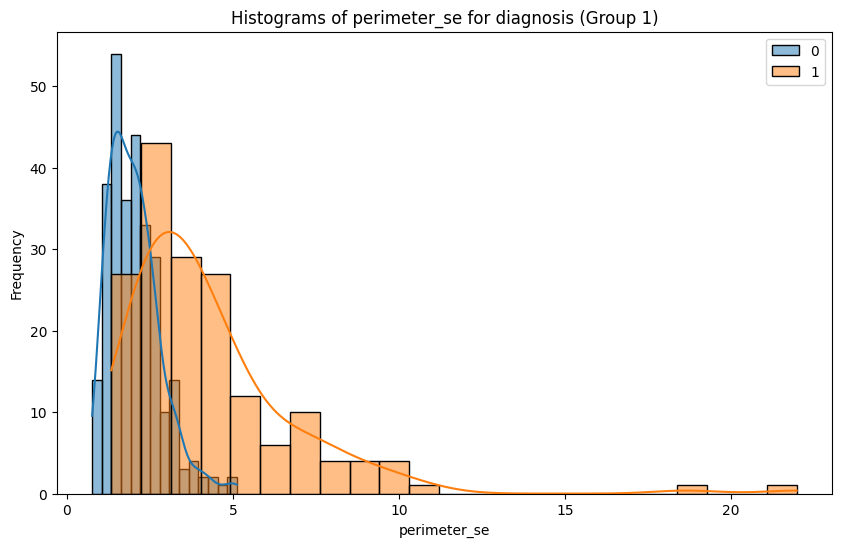

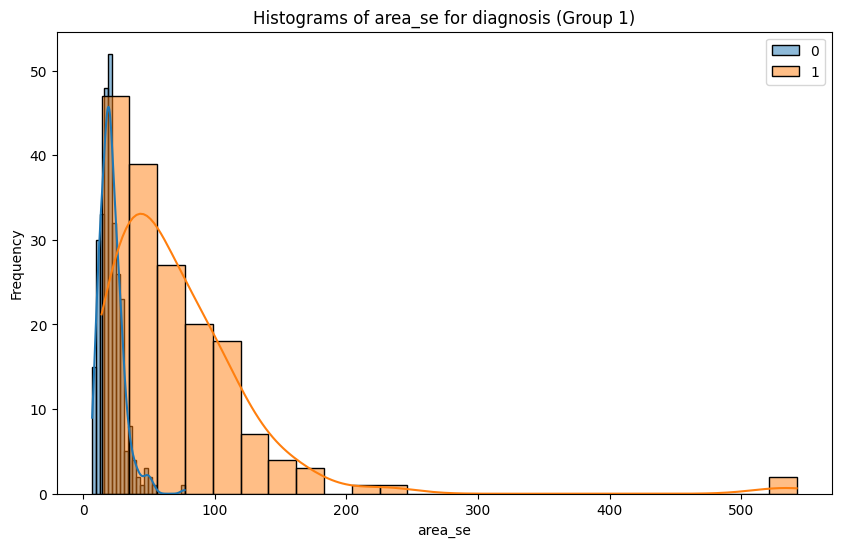

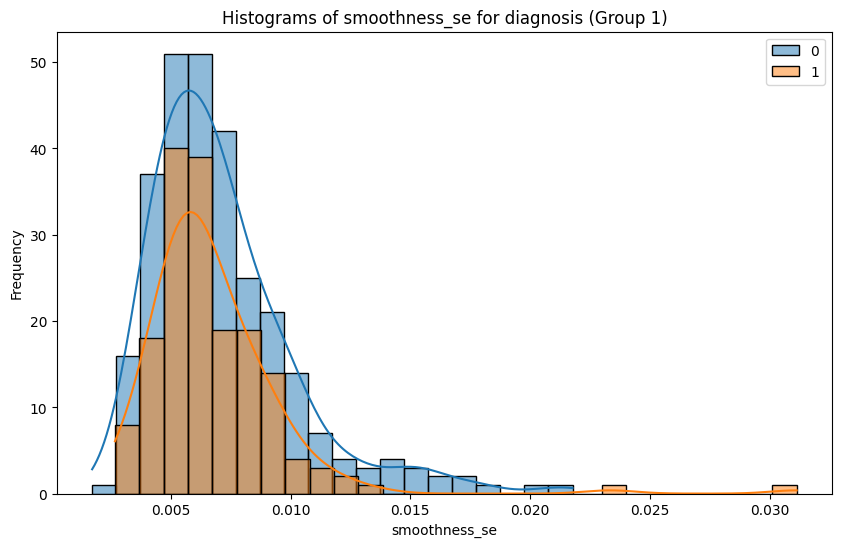

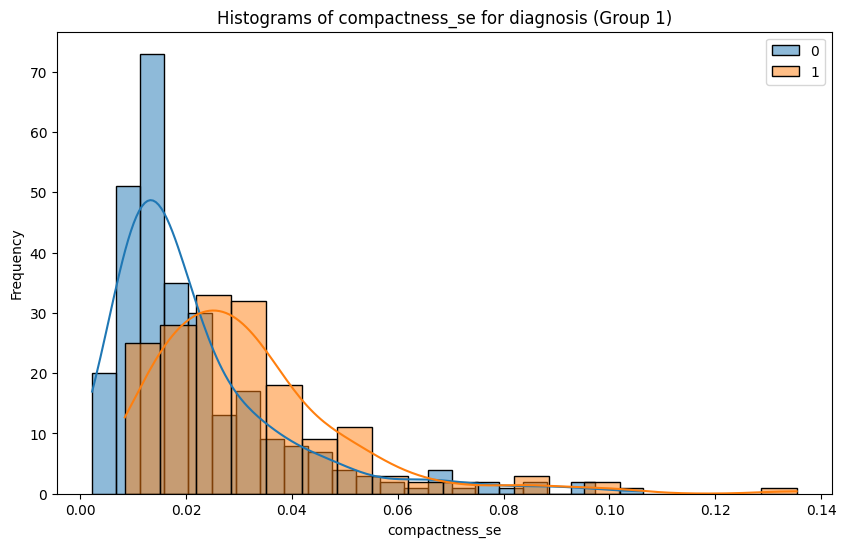

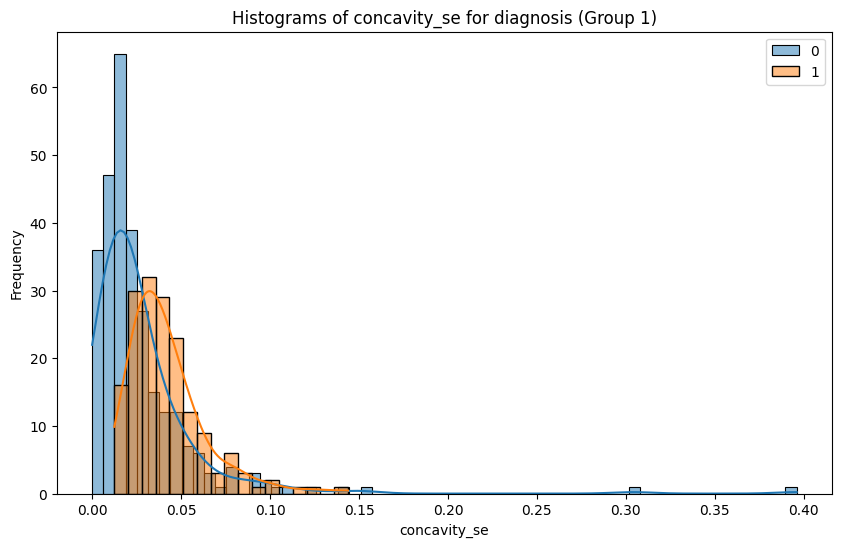

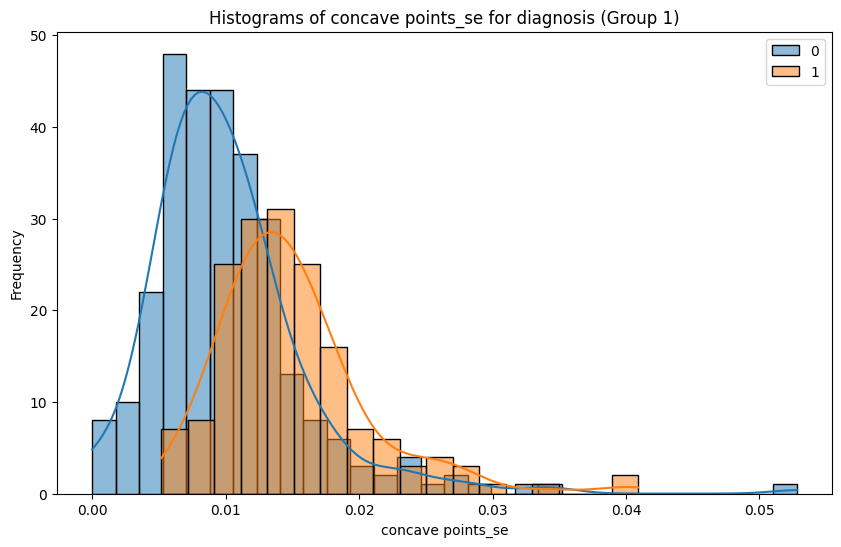

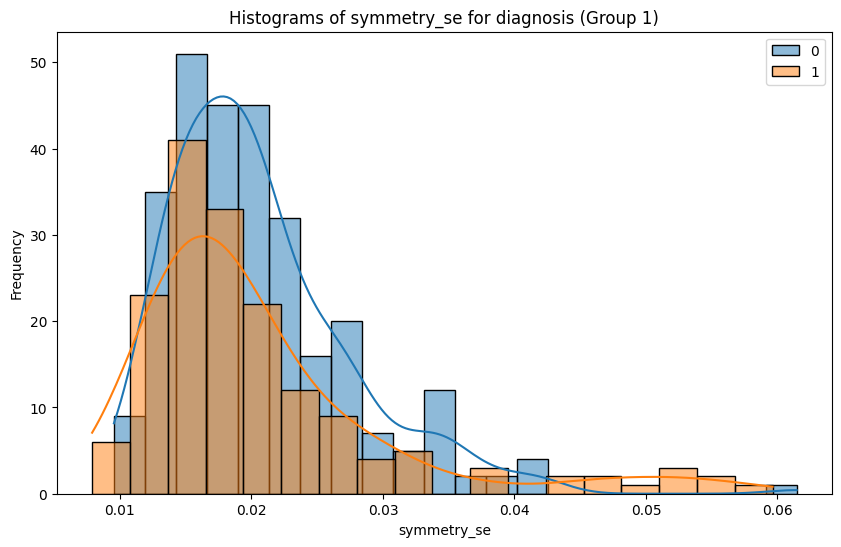

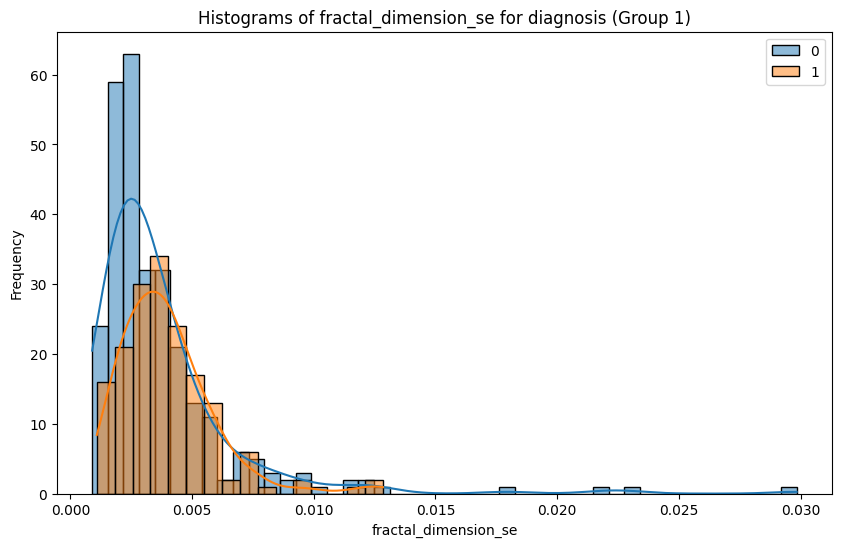

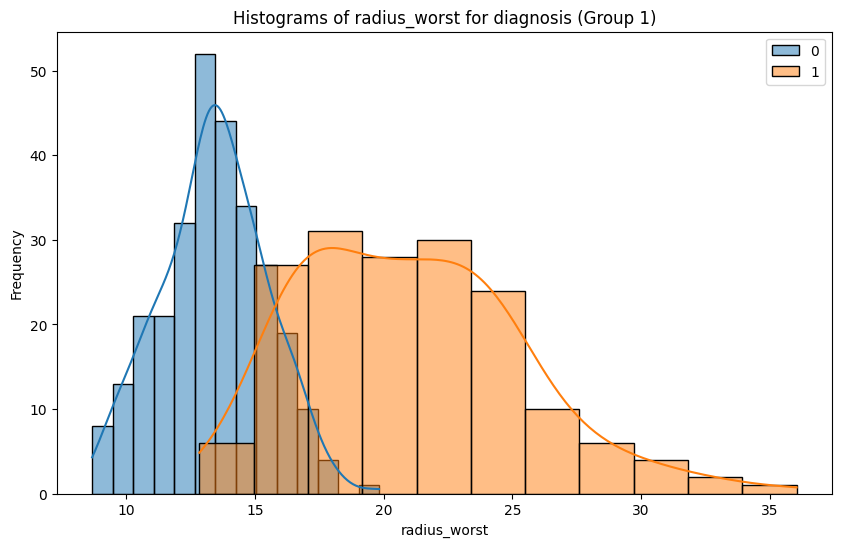

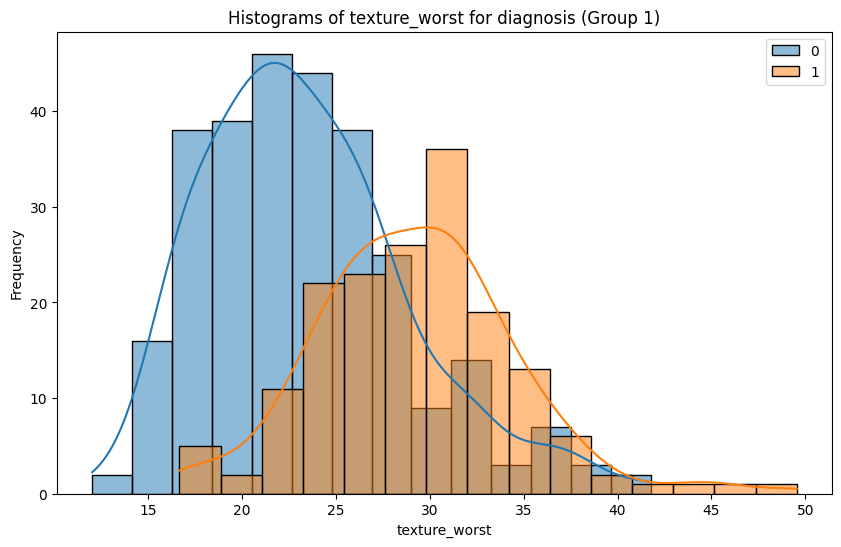

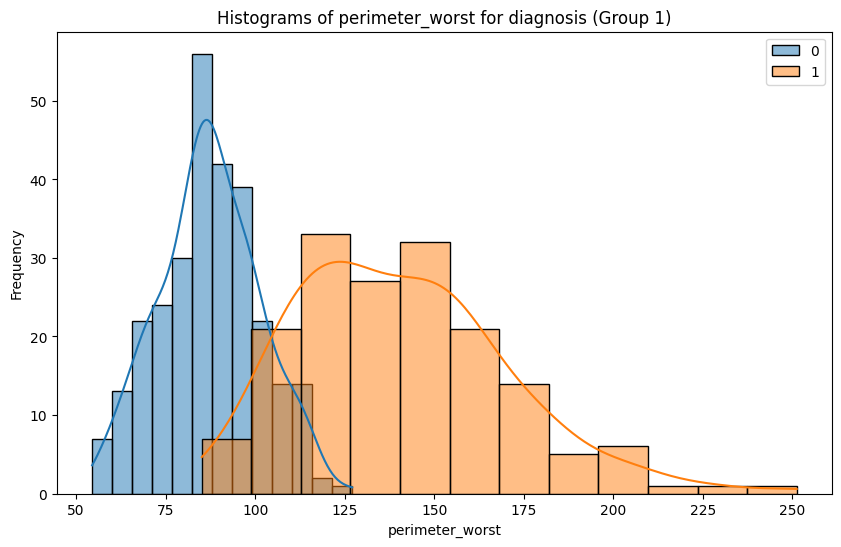

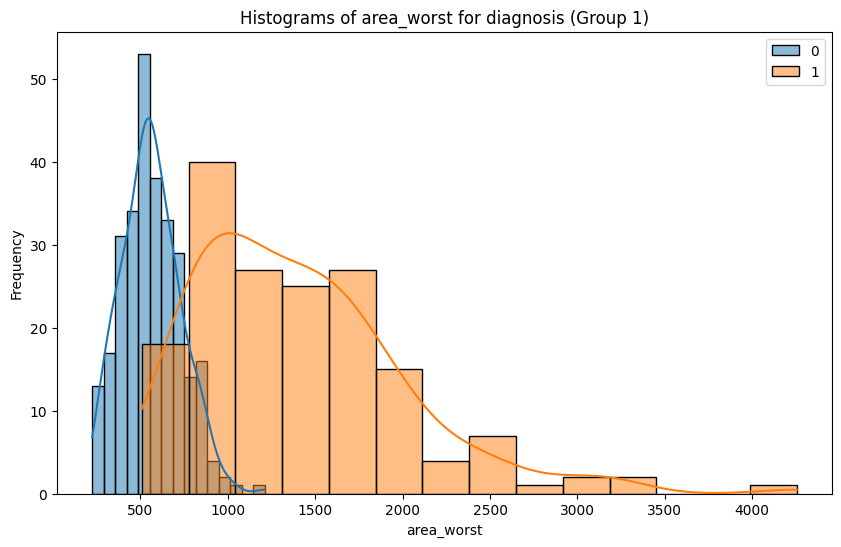

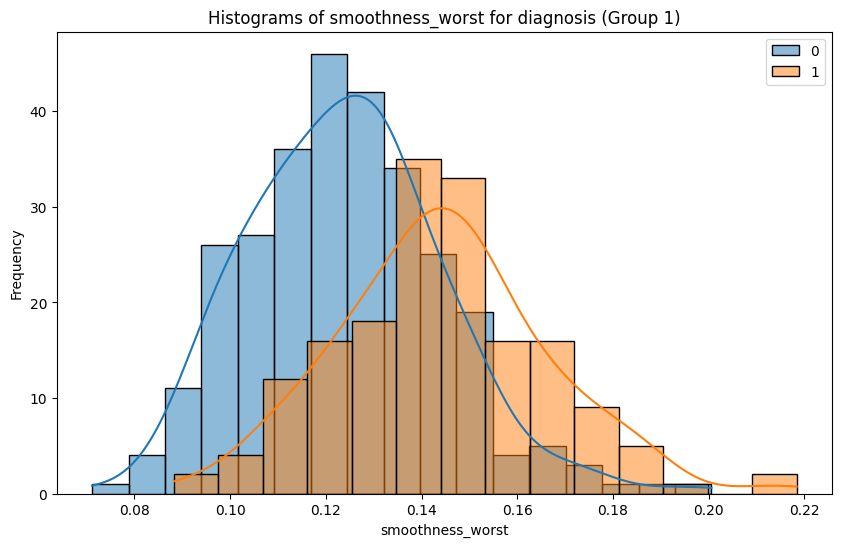

In [10]:
for col in X_train:
    bvt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

In [11]:
features1 = ["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean", "radius_se", "area_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst"]
features2 = ["texture_mean", "smoothness_mean", "compactness_mean", "symmetry_se", "fractal_dimension_mean", "perimeter_se", "compactness_se", "concavity_se", "concave points_se", "fractal_dimension_se"]

In [12]:
# Matriz de correlación entre las todas las features y el target
abs(X_train.corrwith(y_train, numeric_only=True)).sort_values(ascending=False)

concave points_mean       0.778115
perimeter_worst           0.774998
radius_worst              0.766527
perimeter_mean            0.731859
area_worst                0.722875
radius_mean               0.718073
area_mean                 0.695171
concavity_mean            0.683262
compactness_mean          0.590554
radius_se                 0.540126
perimeter_se              0.529211
area_se                   0.517064
texture_worst             0.467479
smoothness_worst          0.430364
texture_mean              0.416213
concave points_se         0.380240
smoothness_mean           0.375137
symmetry_mean             0.348123
compactness_se            0.254370
concavity_se              0.216047
smoothness_se             0.058123
fractal_dimension_se      0.041727
fractal_dimension_mean    0.014308
symmetry_se               0.004723
texture_se                0.003226
dtype: float64

In [13]:
# Calcular la matriz de correlación entre las features
feature_corr = X_train.corr()

# Filtrar las correlaciones absolutas entre 0.8 y 1 o entre -0.8 y -1
selected_features = feature_corr[
    (feature_corr.abs() >= 0.8) & (feature_corr.abs() <= 1)
].stack().reset_index()

# Renombrar columnas para claridad
selected_features.columns = ['Feature1', 'Feature2', 'Correlation']

# Eliminar duplicados y valores de la diagonal principal (correlación con sí misma)
selected_features = selected_features[
    (selected_features['Feature1'] != selected_features['Feature2'])
].drop_duplicates(subset=['Correlation'])

# Mostrar las correlaciones seleccionadas
selected_features

,Feature1,Feature2,Correlation
1,radius_mean,perimeter_mean,0.997850
2,radius_mean,area_mean,0.986609
3,radius_mean,concave points_mean,0.812377
4,radius_mean,radius_worst,0.969134
5,radius_mean,perimeter_worst,0.963536
6,radius_mean,area_worst,0.941849
8,texture_mean,texture_worst,0.909718
11,perimeter_mean,area_mean,0.985985
12,perimeter_mean,concave points_mean,0.842081
13,perimeter_mean,radius_worst,0.969620


### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en función de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En función de la lista anterior, ¿tienes que tratar las variables, por qué?

In [14]:
features1 = ["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean", "radius_se", "area_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst"]
features2 = ["texture_mean", "smoothness_mean", "compactness_mean", "symmetry_se", "fractal_dimension_mean", "perimeter_se", "compactness_se", "concavity_se", "concave points_se", "fractal_dimension_se"]
features = features1 + features2

### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features estén escalados para que el algoritmo no se decante (érroneamente) por alguna feature sólo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

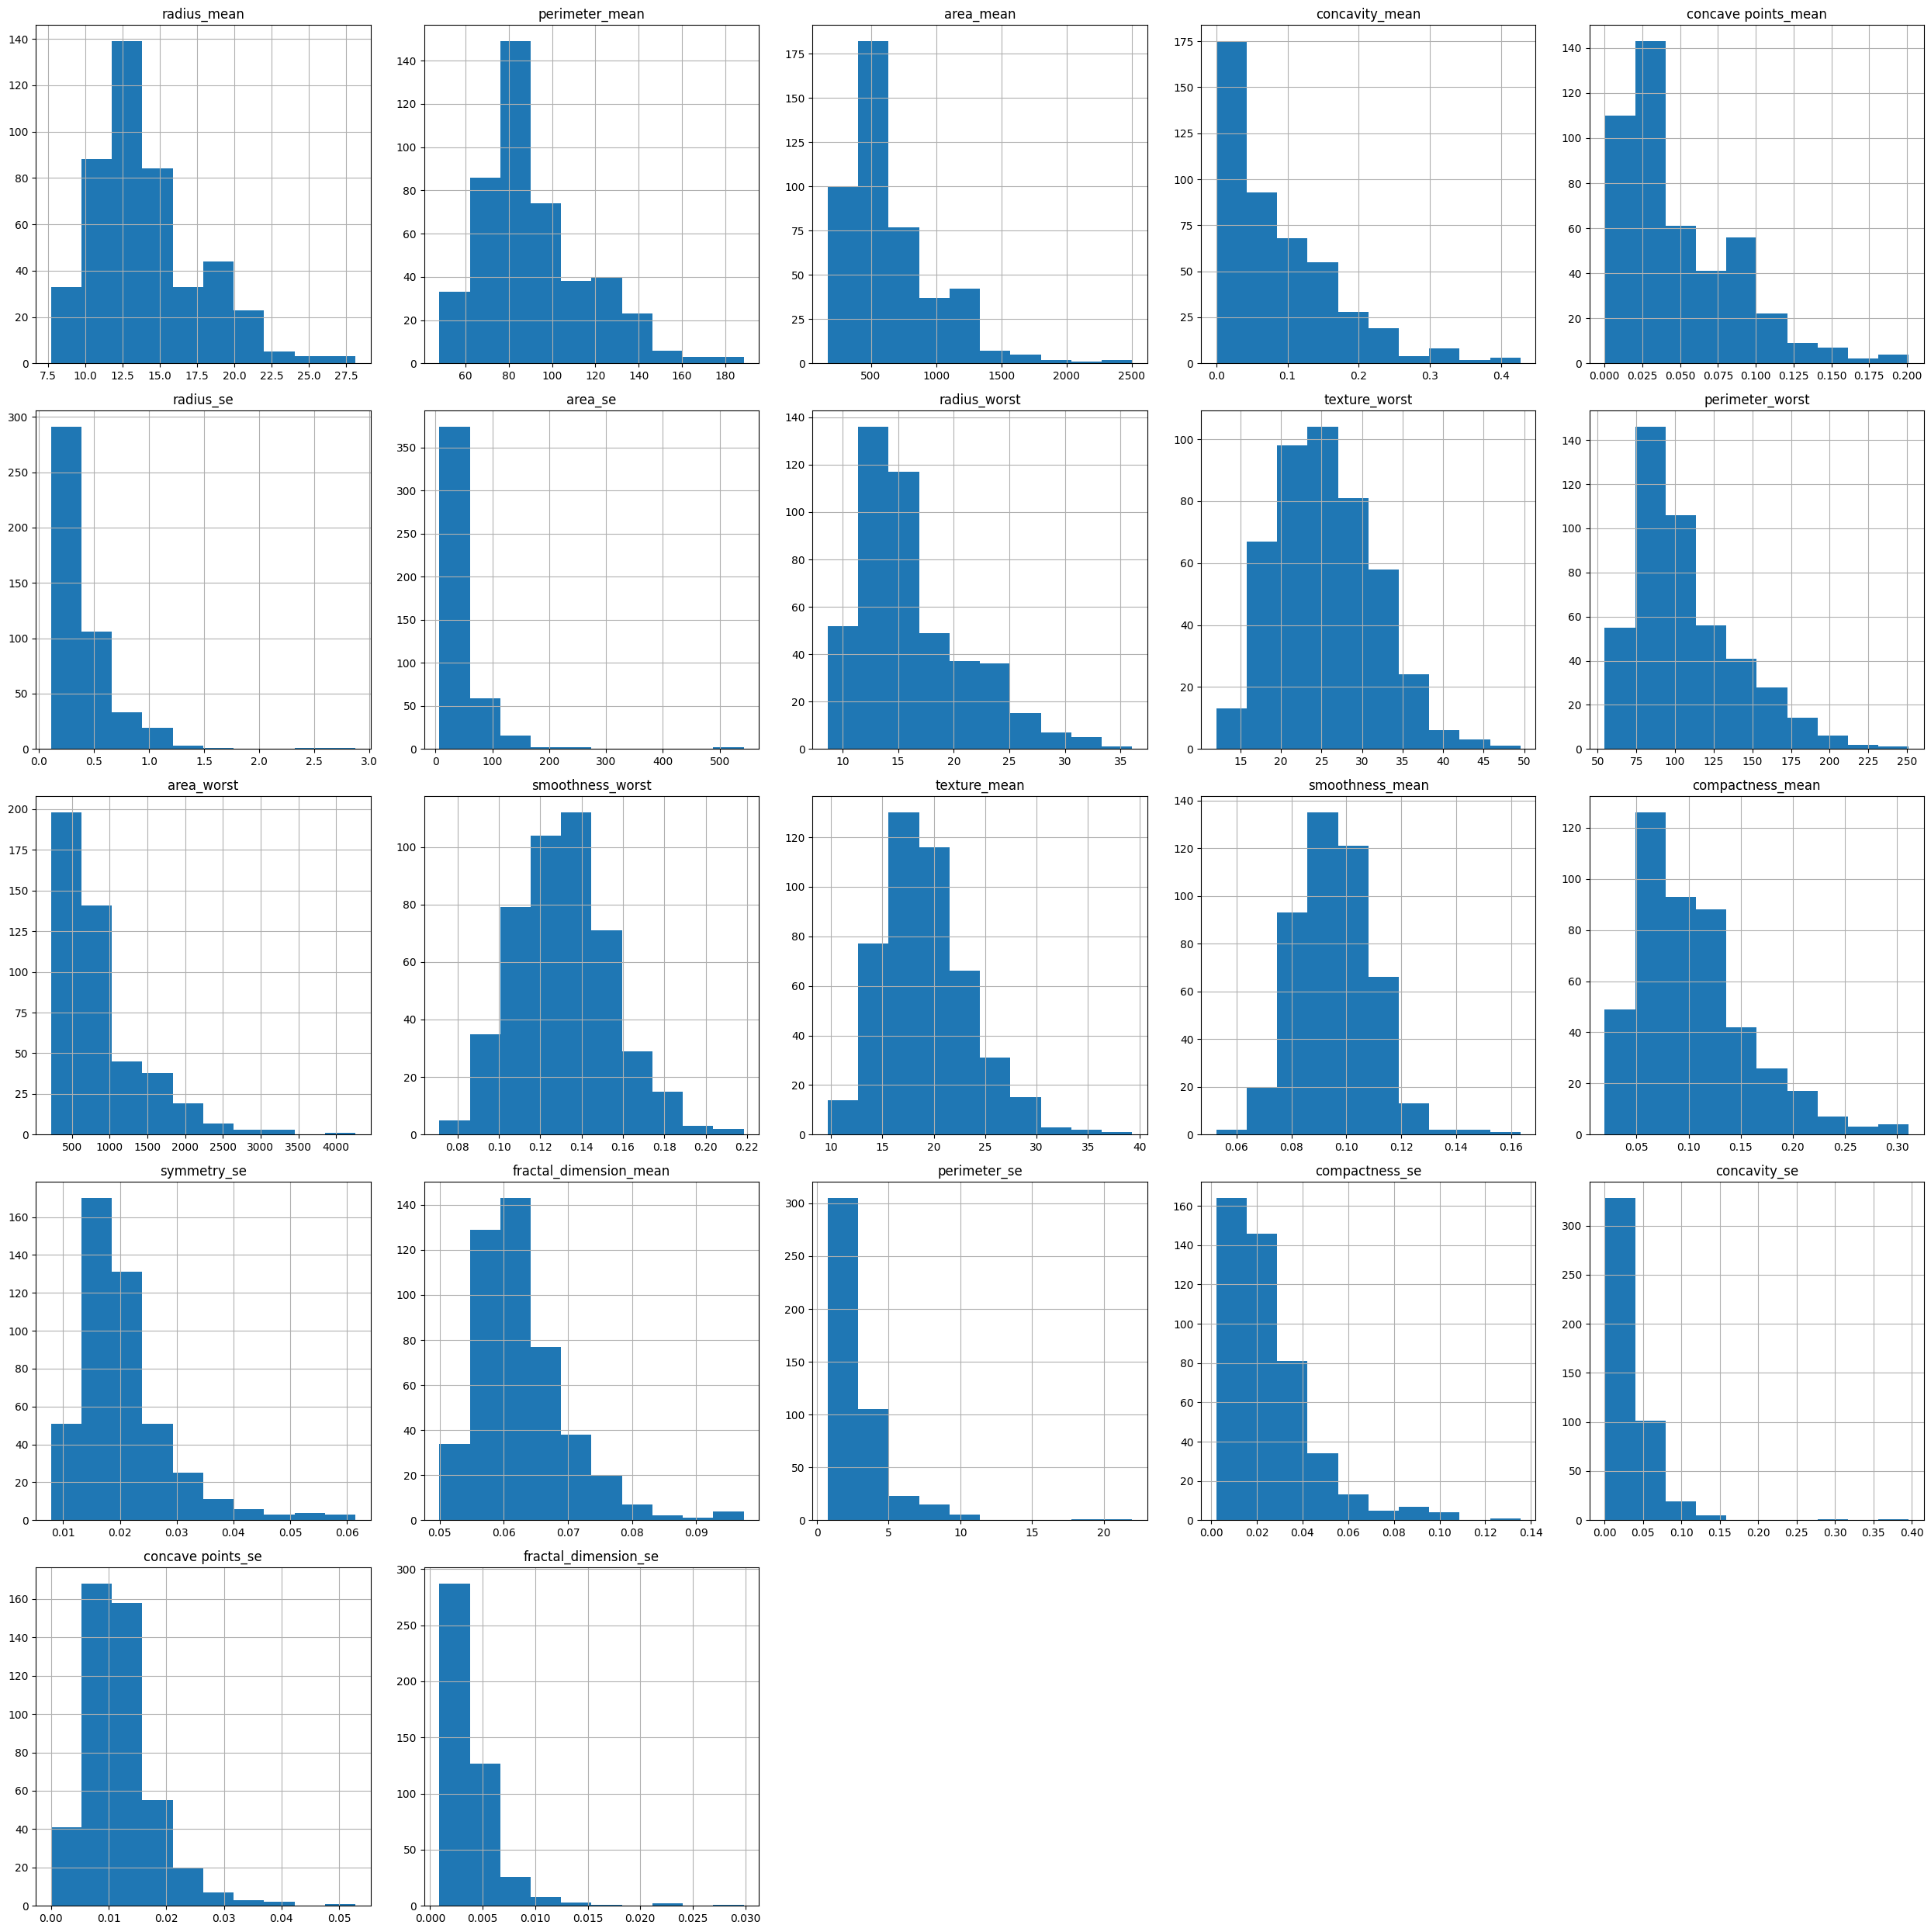

In [15]:
train_set[features].hist(figsize = (25,25))

plt.tight_layout()

In [16]:
features_log = ['area_mean',
                'compactness_mean',
                'concavity_mean',
                'concave points_mean',
                'radius_se',
                'perimeter_se',
                'area_se',
                'compactness_se',
                'concavity_se',
                'fractal_dimension_se',
                'radius_worst',
                'area_worst']

train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [17]:
# Aplicar log1p (asi nos aseguramos que no haya error con las que comiencen en 0) a las características en features_log

for feature in features_log:
    train_set_scaled[feature] = np.log1p(train_set_scaled[feature])
    test_set_scaled[feature] = np.log1p(test_set_scaled[feature])

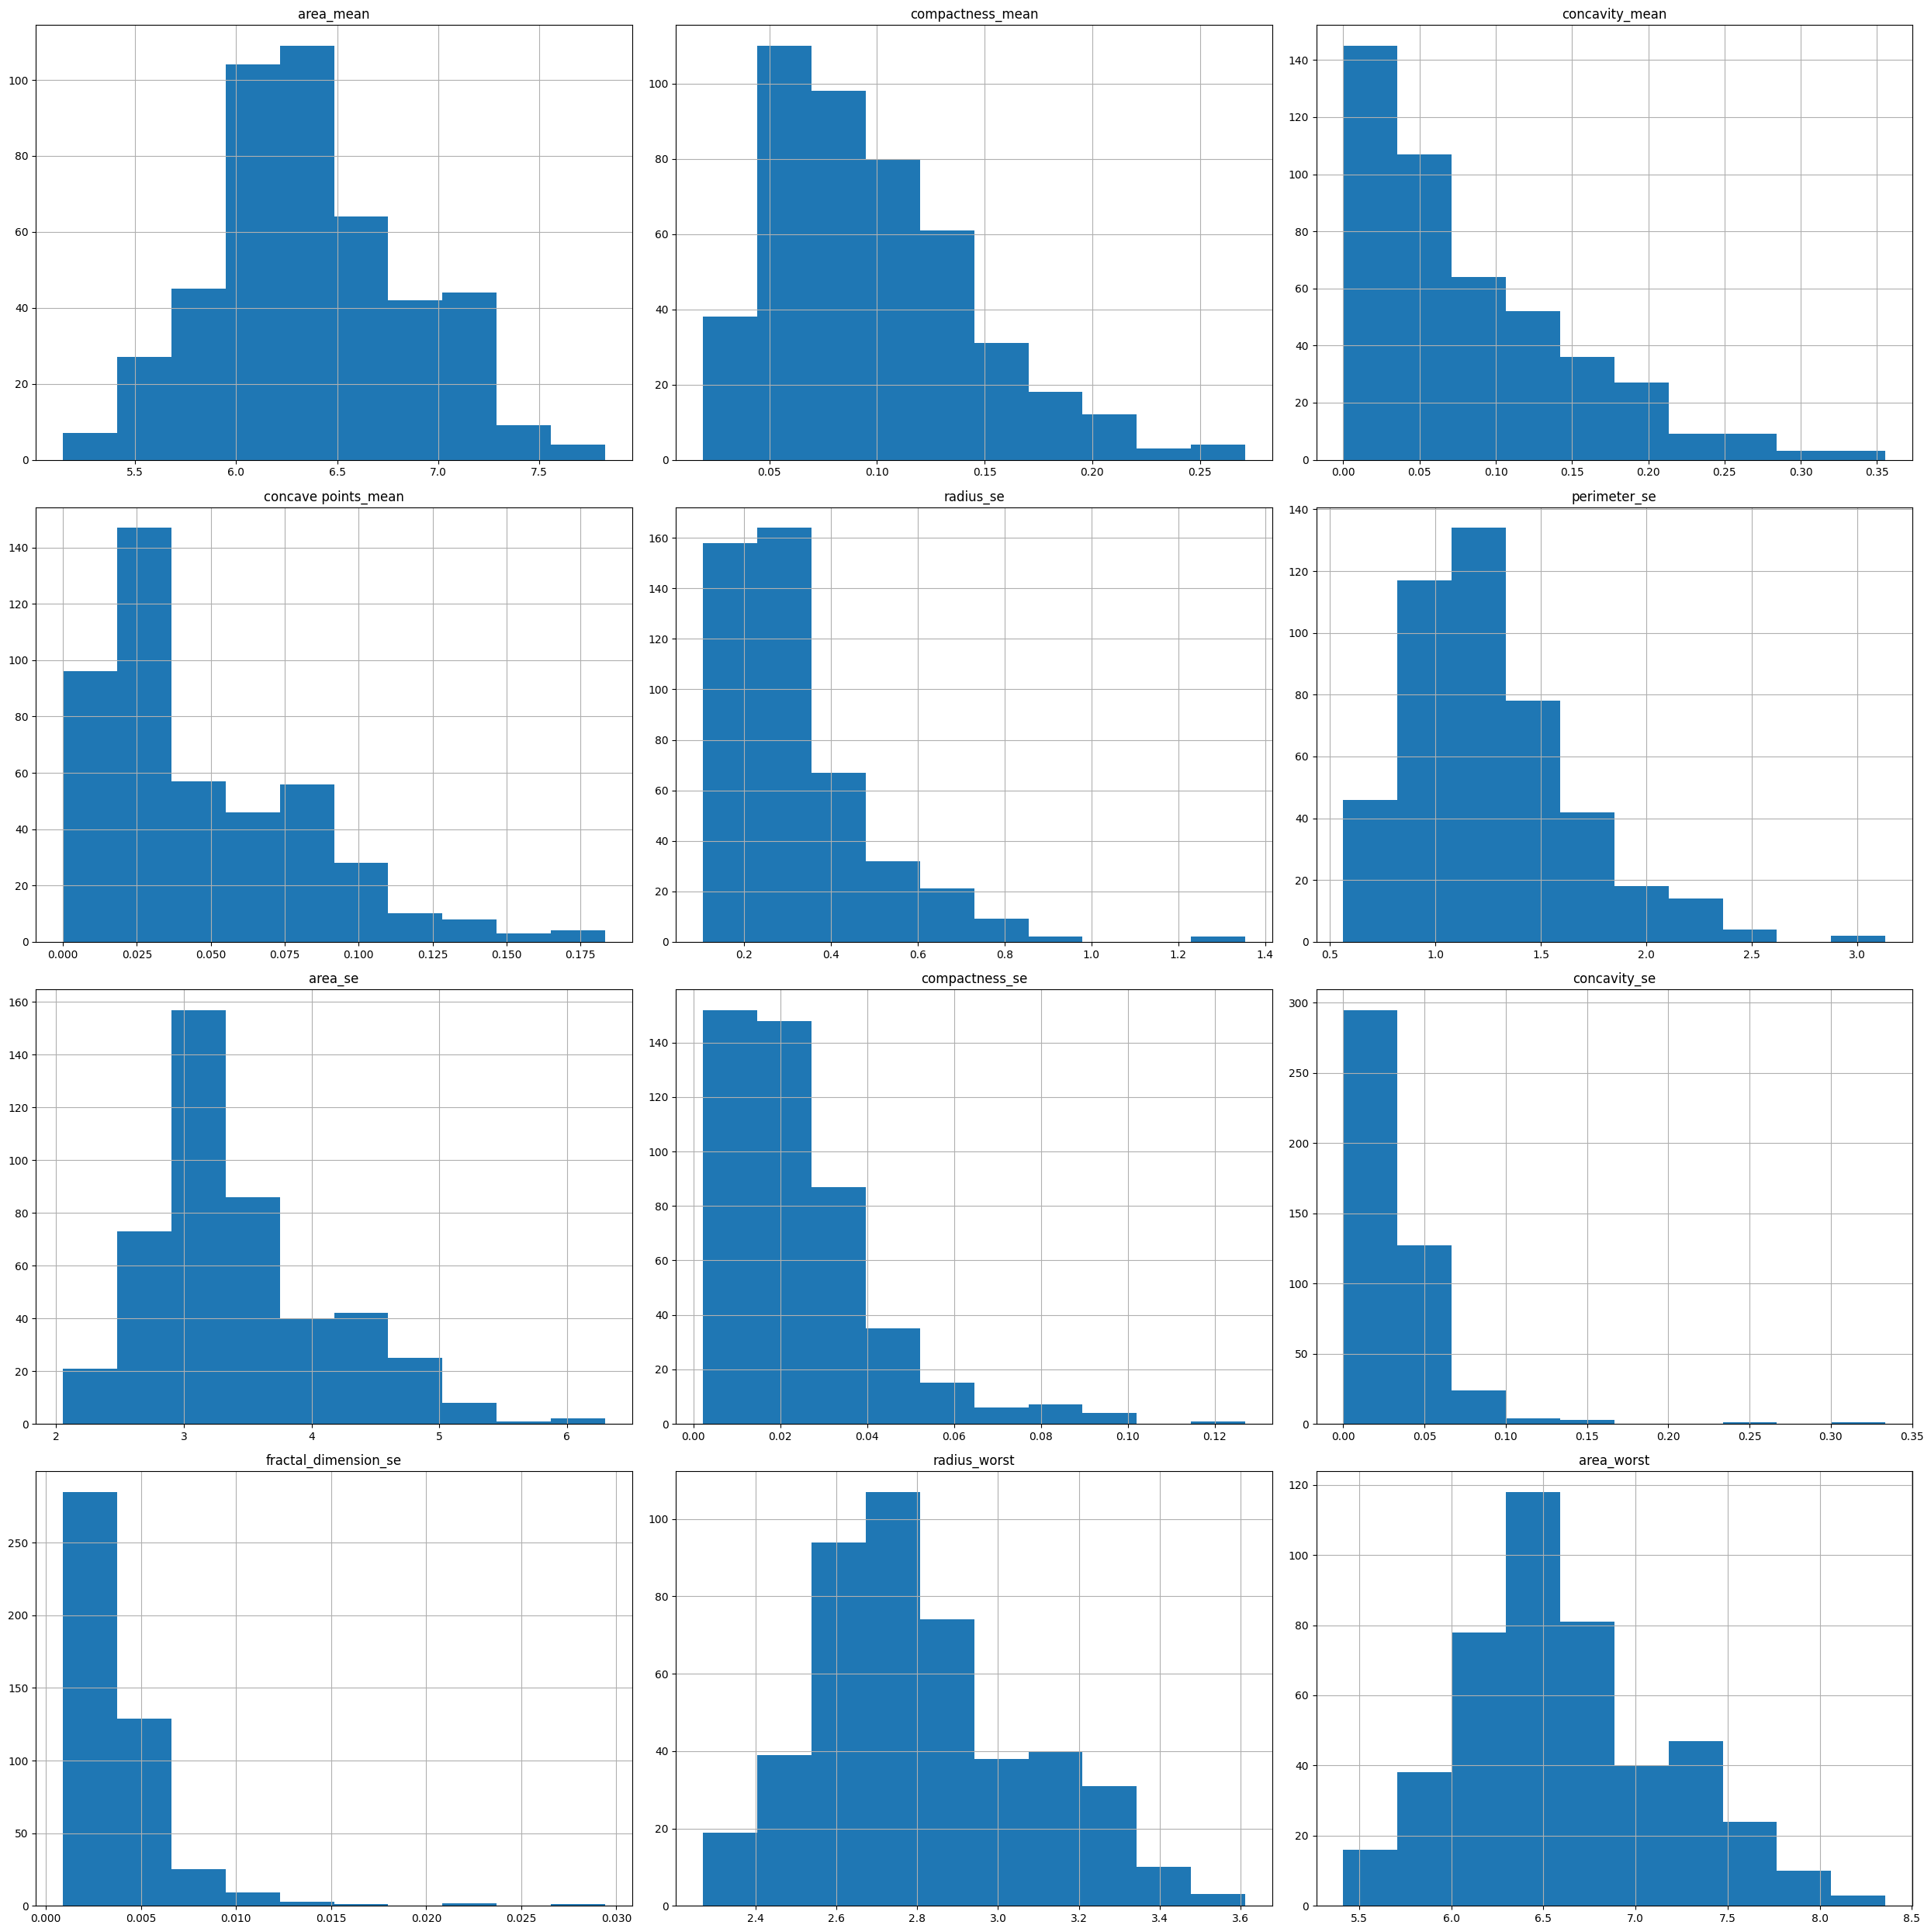

In [18]:
train_set_scaled[features_log].hist(figsize = (25,25))

plt.tight_layout()

In [19]:
scaler = StandardScaler()
train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

### Ejercicio 8: Creación de los dataset de train y test

Crea las parejas X,y de train y test.

In [20]:
# Creación de diversos X dependiendo de las features a seleccionar

# TRAIN SET
X_train_all = train_set[features] # Todas las features sin escalar train_set
X_train_scaled = train_set_scaled[features] # Todas las features escaladas train_set

X_train_1 = train_set[features1] # Selección de las features mas importantes sin escalar train_set
X_train_scaled_1 = train_set_scaled[features1] # Selección de las mas importantes escaladas train_set

X_train_2 = train_set[features2] # Selección de las features que siguen en el orden de importancia sin escalar train_set
X_train_scaled_2 = train_set_scaled[features2] # Selección de las features que siguen en el orden de importancia escaladas train_set

y_train = train_set[target] # Target

# TEST SET
X_test_all = test_set[features] # Todas las features sin escalar test_set
X_test_scaled = test_set_scaled[features] # Todas las features escaladas test_set

X_test_1 = test_set[features1] # Selección de las features mas importantes sin escalar test_set
X_test_scaled_1 = test_set_scaled[features1] # Selección de las mas importantes escaladas test_set

X_test_2 = test_set[features2] # Selección de las features que siguen en el orden de importancia sin escalar test_set
X_test_scaled_2 = test_set_scaled[features2] # Selección de las features que siguen en el orden de importancia escaladas test_set

y_test = test_set[target] # Target


### Ejercicio 9: Instanciación de modelos

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ningún hiperparámetro salvo en los basados en árboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. Si quieres emplear la regresión logística es posible que tengas que utilizar un valor de max_iter para que el algoritmo converja.

In [21]:
lr_clf = LogisticRegression(max_iter = 5000)
rf_clf = RandomForestClassifier(max_depth= 5)
lgb_clf = LGBMClassifier(max_depth= 5, verbose = -100)
xgb_clf = XGBClassifier(max_depth = 5)

modelos = {"Regresion Logistica": lr_clf,
           "Random Forest": rf_clf,
           "Lightgbm": lgb_clf,
           "XGBoost": xgb_clf}

### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validación cruzada). Utiliza k = 5, y un scoring acorde a la métrica escogida en el ejercicio 1. Si no tienes clara la métrica entonces emplea el recall_medio y usa scoring = "balanced acuracy". Escoge el modelo ganador.

In [22]:
# Definir la métrica de evaluación
scoring_func = "balanced_accuracy"  # Se usa balanced accuracy

# Diccionario para almacenar los mejores resultados
resultados = {}

# Conjuntos de features (incluyendo escalado para regresión logística)
feature_sets = {
    "Todas las features": (X_train_all, X_train_scaled, X_test_all, X_test_scaled),
    "Features más importantes": (X_train_1, X_train_scaled_1, X_test_1, X_test_scaled_1),
    "Segunda selección de features": (X_train_2, X_train_scaled_2, X_test_2, X_test_scaled_2)
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\nModelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, (X_train, X_train_scaled, X_test, X_test_scaled) in feature_sets.items():
        # Usar el conjunto escalado solo en la regresión logística
        if nombre_modelo == "Regresion Logistica":
            X_train_usar = X_train_scaled
            X_test_usar = X_test_scaled
        else:
            X_train_usar = X_train
            X_test_usar = X_test

        # Validación cruzada con 5 folds
        scores = cross_val_score(modelo, X_train_usar, y_train, cv=5, scoring=scoring_func)
        recall_medio = np.mean(scores)

        mejores_resultados[nombre_feat] = recall_medio
        print(f"  {nombre_feat}: Recall Medio = {recall_medio:.4f}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = max(mejores_resultados, key=mejores_resultados.get)
    resultados[nombre_modelo] = (mejor_feature_set, mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (balanced accuracy) por modelo:")
for modelo, (feat_set, score) in resultados.items():
    print(f"{modelo}: {feat_set} con {score:.4f}")




Modelo: Regresion Logistica
  Todas las features: Recall Medio = 0.9606
  Features más importantes: Recall Medio = 0.9601
  Segunda selección de features: Recall Medio = 0.8938

Modelo: Random Forest
  Todas las features: Recall Medio = 0.9502
  Features más importantes: Recall Medio = 0.9506
  Segunda selección de features: Recall Medio = 0.8851

Modelo: Lightgbm
  Todas las features: Recall Medio = 0.9601
  Features más importantes: Recall Medio = 0.9536
  Segunda selección de features: Recall Medio = 0.9045

Modelo: XGBoost
  Todas las features: Recall Medio = 0.9601
  Features más importantes: Recall Medio = 0.9584
  Segunda selección de features: Recall Medio = 0.9012

🏆 Mejor score (balanced accuracy) por modelo:
Regresion Logistica: Todas las features con 0.9606
Random Forest: Features más importantes con 0.9506
Lightgbm: Todas las features con 0.9601
XGBoost: Todas las features con 0.9601


### Ejercicio 11: Ajuste de hiperparámetros

Escoge un grid para ajustar los hiperparámetros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su método fit) para encontrar la mejor combinaciónde hiperparámetros empleando la métrica que decidimos en el ejercio 1. Si no lo tienes claro emplea "balance accuracy". Por otro lado, incluye en el grid, el hiperparámetro que permita que el modelo "compense" el desbalanceo del dataset de entrada, aunque este no lo tenga.

In [23]:
# Definir la métrica de evaluación
scoring_func = "balanced_accuracy"  # Se usa balanced accuracy

# Diccionario para almacenar los mejores resultados
resultados = {}

# Hiperparámetros para cada modelo
param_grid = {
    "Regresion Logistica": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "class_weight": ["balanced", None]  # Se agrega class_weight=balanced
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "class_weight": ["balanced", None]  # Se agrega class_weight=balanced
    },
    "Lightgbm": {
        "num_leaves": [10, 20, 30],
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [50, 100, 200],
        "scale_pos_weight": [1, 2, 5]  # Escala de ponderación para tratar el desbalanceo
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200],
        "scale_pos_weight": [1, 2, 5]  # Escala de ponderación para tratar el desbalanceo
    }
}

# Conjuntos de features (incluyendo escalado para regresión logística)
feature_sets = {
    "Todas las features": (X_train_all, X_train_scaled, X_test_all, X_test_scaled),
    "Features más importantes": (X_train_1, X_train_scaled_1, X_test_1, X_test_scaled_1),
    "Segunda selección de features": (X_train_2, X_train_scaled_2, X_test_2, X_test_scaled_2)
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\n🔍 Ajustando modelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, (X_train, X_train_scaled, X_test, X_test_scaled) in feature_sets.items():
        # Usar el conjunto escalado solo en la regresión logística
        if nombre_modelo == "Regresion Logistica":
            X_train_usar = X_train_scaled
            X_test_usar = X_test_scaled
        else:
            X_train_usar = X_train
            X_test_usar = X_test

        # GridSearchCV para encontrar los mejores hiperparámetros
        grid_search = GridSearchCV(
            modelo,
            param_grid[nombre_modelo],
            cv=5,
            scoring=scoring_func,
            n_jobs=-1
        )

        grid_search.fit(X_train_usar, y_train)
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

        mejores_resultados[nombre_feat] = (best_score, best_params)
        print(f"  {nombre_feat}: Mejor Recall Medio = {best_score:.4f}, Hiperparámetros = {best_params}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = max(mejores_resultados, key=lambda k: mejores_resultados[k][0])
    resultados[nombre_modelo] = (mejor_feature_set, *mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor configuración por modelo:")
for modelo, (feat_set, score, params) in resultados.items():
    print(f"{modelo}: {feat_set} con {score:.4f}, Hiperparámetros óptimos: {params}")



🔍 Ajustando modelo: Regresion Logistica
  Todas las features: Mejor Recall Medio = 0.9082, Hiperparámetros = {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
  Features más importantes: Mejor Recall Medio = 0.9655, Hiperparámetros = {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
  Segunda selección de features: Mejor Recall Medio = 0.9082, Hiperparámetros = {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}

🔍 Ajustando modelo: Random Forest
  Todas las features: Mejor Recall Medio = 0.9613, Hiperparámetros = {'class_weight': None, 'max_depth': 10, 'n_estimators': 50}
  Features más importantes: Mejor Recall Medio = 0.9599, Hiperparámetros = {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}
  Segunda selección de features: Mejor Recall Medio = 0.8981, Hiperparámetros = {'class_weight': None, 'max_depth': None, 'n_estimators': 200}

🔍 Ajustando modelo: Lightgbm
  Todas las features: Mejor Recall Medio = 0.9677, Hiperparámetros = {'le

### Ejercicio 12: Evaluación del modelo

Evalúa el modelo contra el dataset de test. Muestra el informe de clasificación y haz una valoración de si el hospital aceptaría el modelo o no.


📝 Informe de clasificación del modelo en el conjunto de test:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy del modelo en el conjunto de prueba: 0.9737


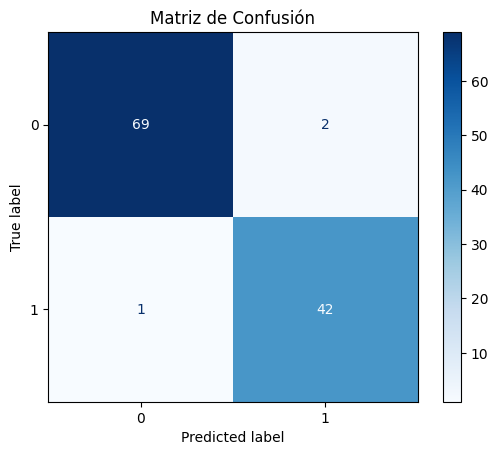

In [37]:
# Elegimos el mejor modelo y su conjunto de características
mejor_modelo_nombre = "Regresion Logistica"  # Asegúrate de que sea el modelo con mejor rendimiento según los resultados previos
mejor_feature_set = resultados[mejor_modelo_nombre][0]
best_params = resultados[mejor_modelo_nombre][1]

# Seleccionar las características del mejor conjunto de datos (según los resultados anteriores)
if mejor_feature_set == "Todas las features":
    X_test_usar = X_test_scaled
elif mejor_feature_set == "Features más importantes":
    X_test_usar = X_test_scaled_1
else:
    X_test_usar = X_test_scaled_2

# Ajustamos el modelo con los mejores hiperparámetros
modelo_final = GridSearchCV(modelos[mejor_modelo_nombre], 
                            param_grid[mejor_modelo_nombre], 
                            cv=5, 
                            scoring="balanced_accuracy", 
                            n_jobs=-1)

modelo_final.fit(X_train_usar, y_train)

# Realizamos la predicción sobre el conjunto de test
y_pred = modelo_final.predict(X_test_usar)

# Evaluación del rendimiento del modelo
print("\n📝 Informe de clasificación del modelo en el conjunto de test:")
print(classification_report(y_test, y_pred))

# Obtener la precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")

# Matriz de Confusión con ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualizar la Matriz de Confusión utilizando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_final.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.show()

### Ejercicio 13: Análisis de errores

Muestra la matriz de confusión con los porcentajes de precisión (emplea ConfusionMatrixDisplay.from_predictions con el argumento normalize con el valor adecuado). Haz un pequeño análisis.

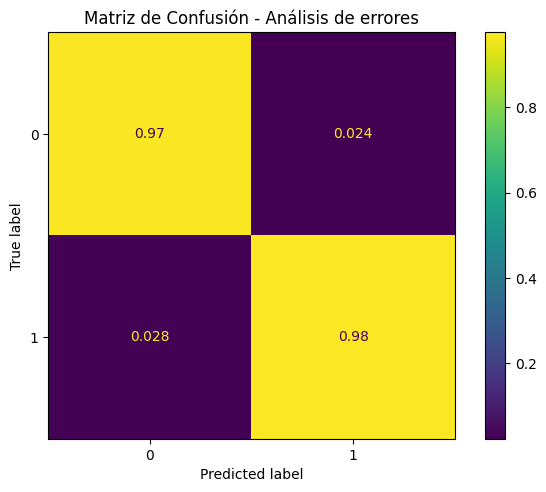

In [25]:
# Mostrar la matriz de confusión con valores flotantes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="pred")
plt.tight_layout()
plt.title('Matriz de Confusión - Análisis de errores')
plt.show()

### EXTRA: 

Busca en Internet o pregúntale a tu AI preferida, cómo se graba un modelo en disco y gúardalo en "./models/cancer_pred" con la extesión apropiada.